# Travel and Tourism Survey Analysis - Interactive Notebook

This notebook performs a comprehensive analysis of the Travel and Tourism Survey dataset, including data cleaning, exploratory data analysis (EDA), machine learning (ML) modeling, and feature engineering.

**Instructions:**
1.  **Save this notebook** (`.ipynb` file) to your local machine.
2.  **Ensure the Excel file** `Travel and Tourism Survey (Responses).xlsx` is in the same directory as this notebook, or update the `file_path` variable in the "Data Loading" cell to the correct path.
3.  **Install required libraries** if you haven't already. You can run this in a terminal or notebook cell:
    ```bash
    pip install pandas openpyxl seaborn matplotlib scikit-learn streamlit
    # or
    conda install pandas openpyxl seaborn matplotlib scikit-learn streamlit
    ```
4.  **Run each cell sequentially** by selecting a cell and pressing `Shift + Enter` (or using the "Run" button in VS Code/Jupyter).
5.  **Examine the output** of each cell. Print statements and visualizations will be displayed below each cell.
6.  **Debug and analyze** based on the outputs, especially when we encounter errors or unexpected results.

Let's begin!

In [1]:
# --- Libraries ---
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score
import streamlit as st  # Importing Streamlit library (though not used in this script, included for potential dashboard usage)

## Step 1: Data Loading and Initial Inspection

In [2]:
# --- Step 1: Data Loading and Initial Inspection ---
file_path = "Travel and Tourism Survey (Responses).xlsx"  # Replace with your file path if needed
xls = pd.ExcelFile(file_path)
sheet_names = xls.sheet_names
print("Sheet names in Excel file:", sheet_names)

# Define dtypes for columns that *might* be numerical but are ranges, so we inspect as strings first
column_dtypes = {
    "4. What is your annual income range?": str,
    "9. What is your average travel budget per trip?": str
}

df = pd.read_excel(xls, sheet_name="Form responses 1", dtype=column_dtypes) # Apply dtype argument
print("Data types of DataFrame immediately after loading:") # ADDED
print(df.dtypes) # ADDED
print("\nFirst 5 rows of the DataFrame:")
print(df.head())

Sheet names in Excel file: ['Form responses 1']
Data types of DataFrame immediately after loading:
Timestamp                                                                                   datetime64[ns]
Name                                                                                                object
Email                                                                                               object
1. What is your age group?                                                                          object
2. What is your gender?                                                                             object
3. What is your occupation?                                                                         object
4. What is your annual income range?                                                                object
5. How often do you travel for leisure?                                                             object
6. What time of the year do you prefer to tra

## Step 2: Data Cleaning

In [3]:
# --- Step 2: Data Cleaning ---
df_cleaned = df.copy()

# 2.1 Remove Unnecessary Columns (Timestamp, Name, Email)
columns_to_drop = ["Timestamp", "Name", "Email"]
df_cleaned = df_cleaned.drop(columns=columns_to_drop, errors='ignore') # errors='ignore' to avoid error if column doesn't exist

# 2.2 Check for Missing Values
missing_values = df_cleaned.isnull().sum()
print("\nMissing values per column:")
print(missing_values[missing_values > 0]) # Print only columns with missing values

# 2.3 Check for Duplicates
duplicate_rows = df_cleaned.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")

# 2.4 Standardize Categorical Values (Lowercase and Strip Spaces)
df_cleaned = df_cleaned.apply(lambda x: x.str.strip().str.lower() if x.dtype == "object" else x)

# Clean Column Names (Remove extra spaces)
df_cleaned.columns = df_cleaned.columns.str.strip()

print("\nCleaned DataFrame - First 5 rows:")
print(df_cleaned.head())


Missing values per column:
Series([], dtype: int64)

Number of duplicate rows: 0

Cleaned DataFrame - First 5 rows:
  1. What is your age group? 2. What is your gender?  \
0                      18–25                    male   
1                   under 18                    male   
2                   under 18                    male   
3                      18–25                    male   
4                      18–25                    male   

  3. What is your occupation? 4. What is your annual income range?  \
0                    employed                 ₹5,00,000–₹10,00,000   
1                     student                  ₹2,00,000–₹5,00,000   
2                     student                  ₹2,00,000–₹5,00,000   
3                     student                  less than ₹2,00,000   
4                     student                  less than ₹2,00,000   

  5. How often do you travel for leisure?  \
0                        2–3 times a year   
1                                  

## Step 3: Exploratory Data Analysis (EDA) - Visualizations

C:\Users\vandi\AppData\Local\Temp\ipykernel_13080\2512953205.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=data, palette="viridis", order=data.value_counts().index)


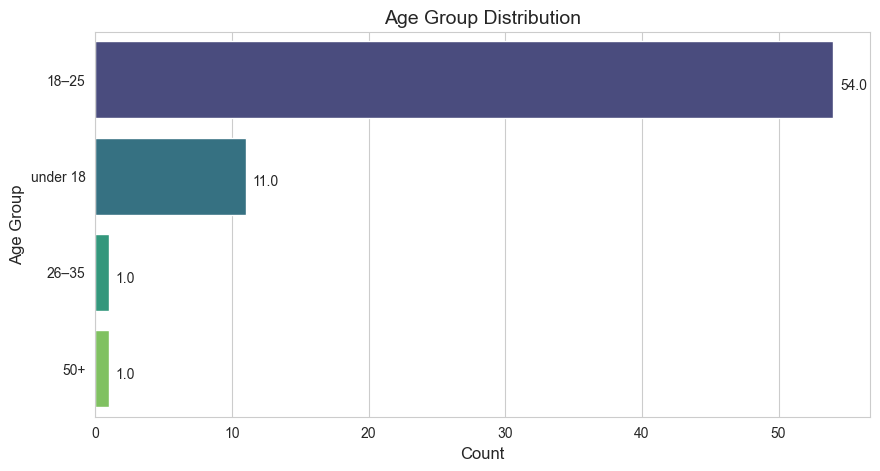

C:\Users\vandi\AppData\Local\Temp\ipykernel_13080\2512953205.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=data, palette="viridis", order=data.value_counts().index)


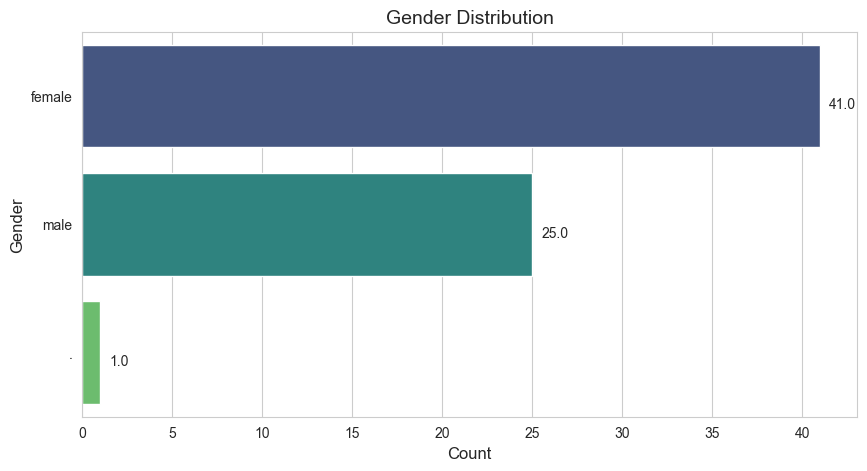

C:\Users\vandi\AppData\Local\Temp\ipykernel_13080\2512953205.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=data, palette="viridis", order=data.value_counts().index)


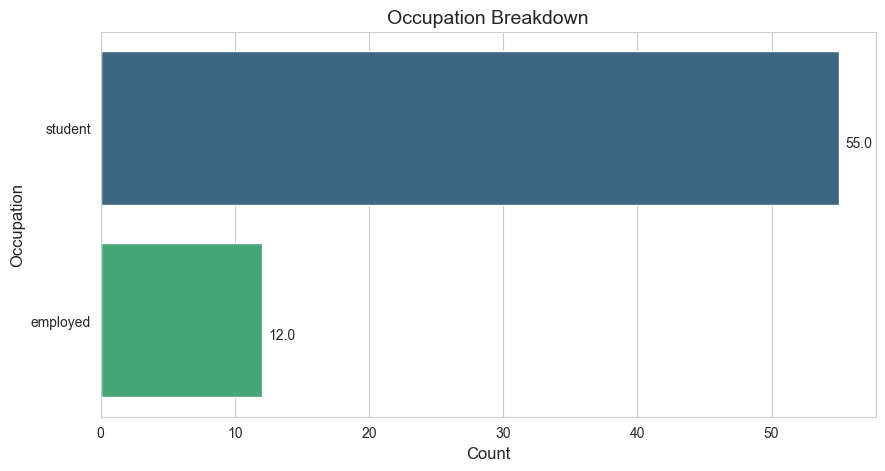

C:\Users\vandi\AppData\Local\Temp\ipykernel_13080\2512953205.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=data, palette="viridis", order=data.value_counts().index)


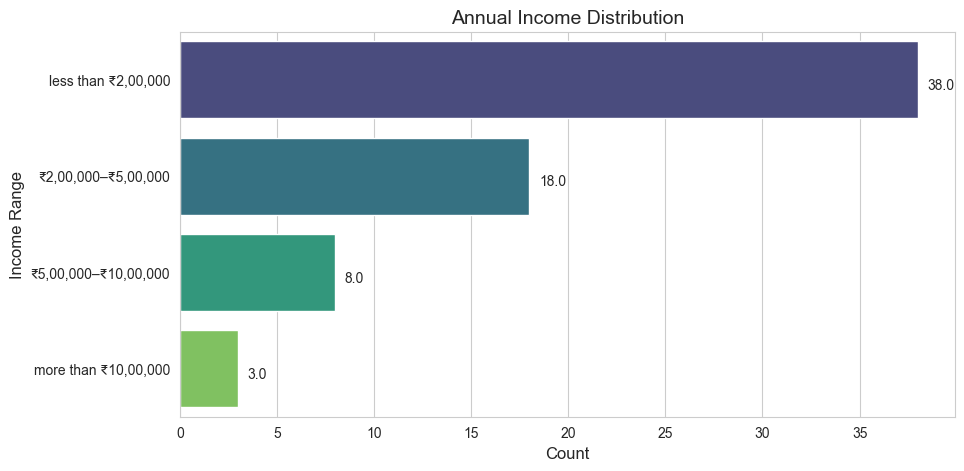

C:\Users\vandi\AppData\Local\Temp\ipykernel_13080\2512953205.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=data, palette="viridis", order=data.value_counts().index)


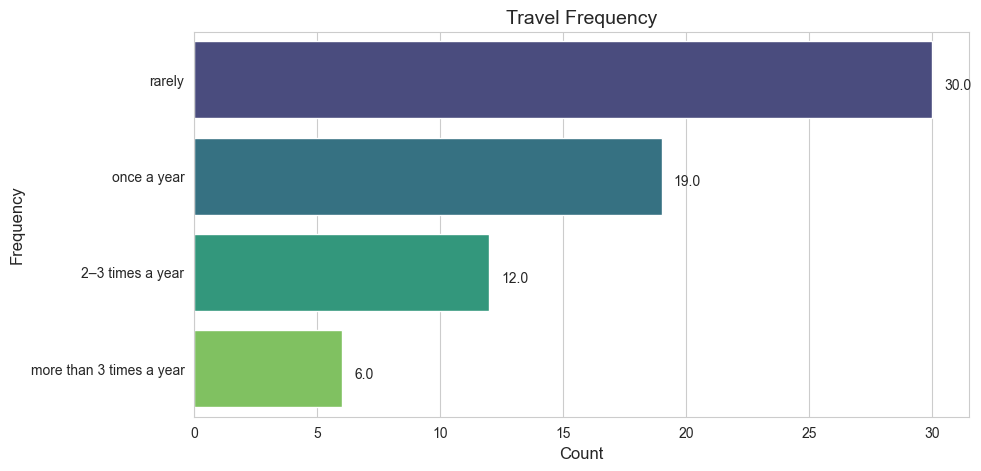

C:\Users\vandi\AppData\Local\Temp\ipykernel_13080\2512953205.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=data, palette="viridis", order=data.value_counts().index)


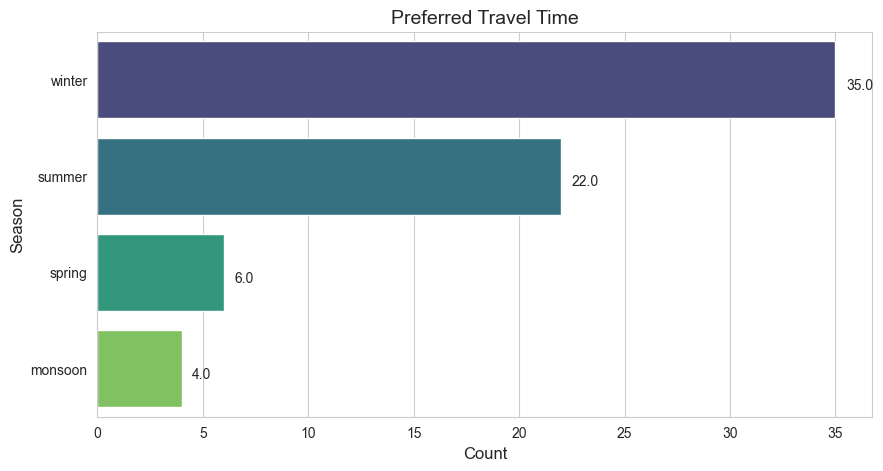

C:\Users\vandi\AppData\Local\Temp\ipykernel_13080\2512953205.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=data, palette="viridis", order=data.value_counts().index)


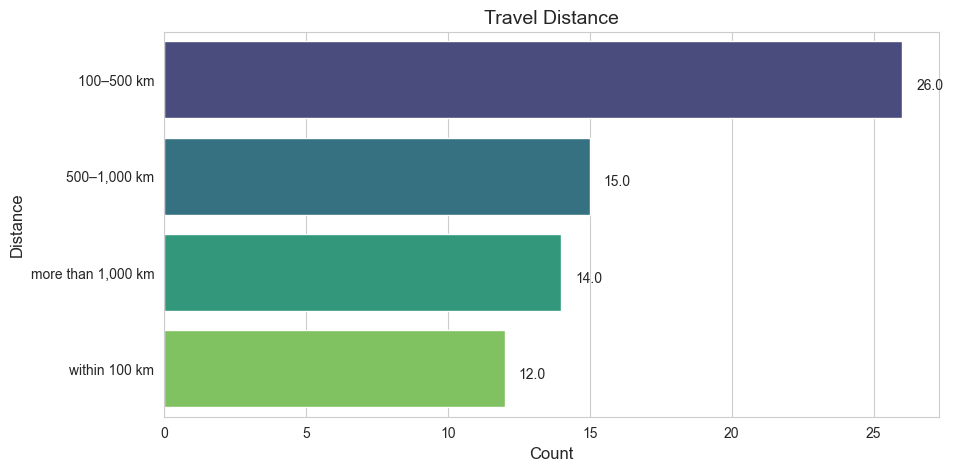

C:\Users\vandi\AppData\Local\Temp\ipykernel_13080\2512953205.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=data, palette="viridis", order=data.value_counts().index)


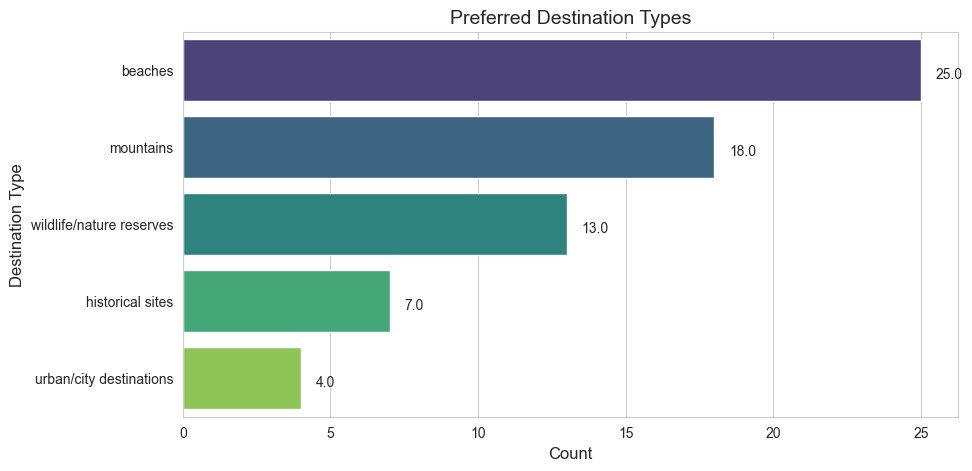

C:\Users\vandi\AppData\Local\Temp\ipykernel_13080\2512953205.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=data, palette="viridis", order=data.value_counts().index)


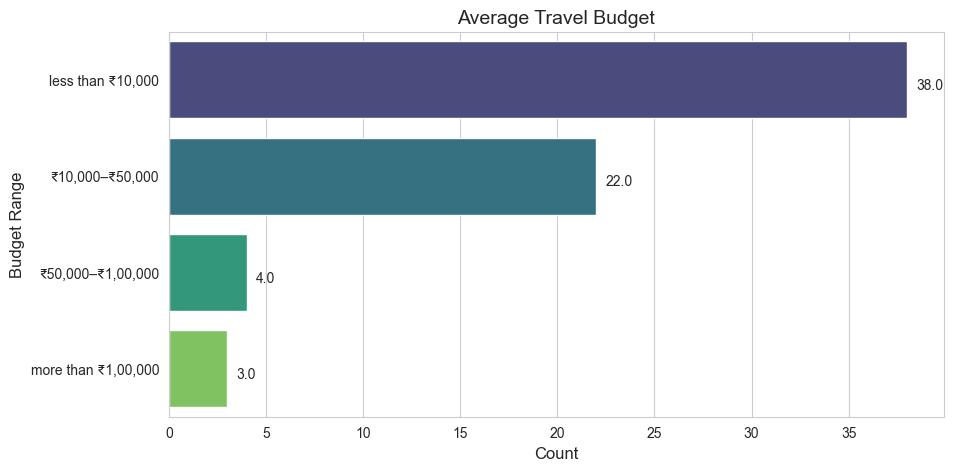

C:\Users\vandi\AppData\Local\Temp\ipykernel_13080\2512953205.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=data, palette="viridis", order=data.value_counts().index)


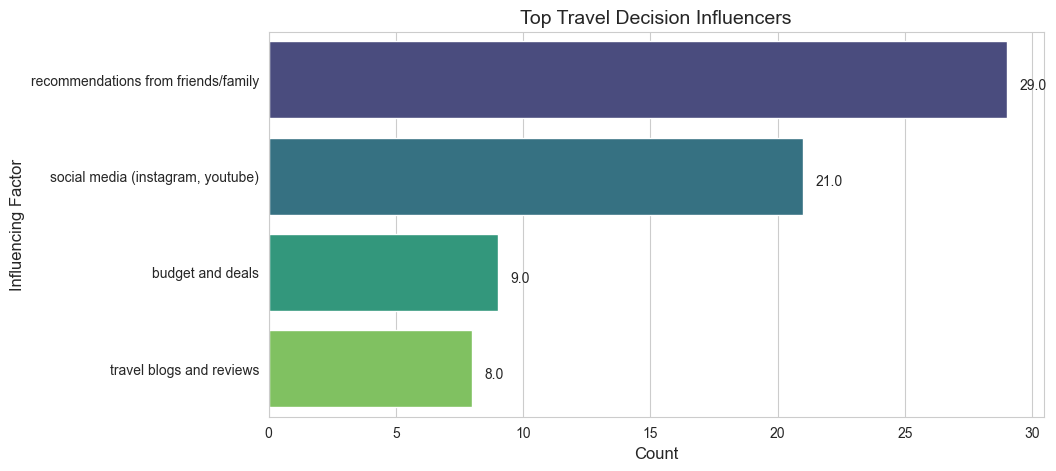

C:\Users\vandi\AppData\Local\Temp\ipykernel_13080\2512953205.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=data, palette="viridis", order=data.value_counts().index)


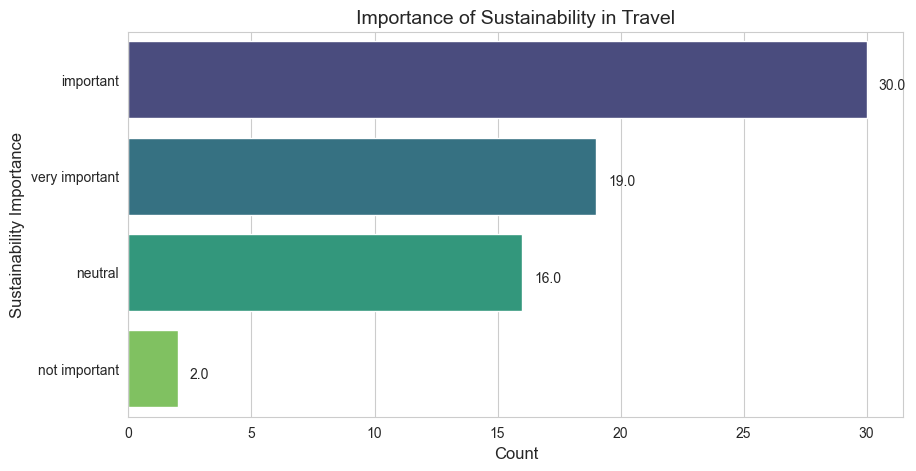

C:\Users\vandi\AppData\Local\Temp\ipykernel_13080\2512953205.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=data, palette="viridis", order=data.value_counts().index)


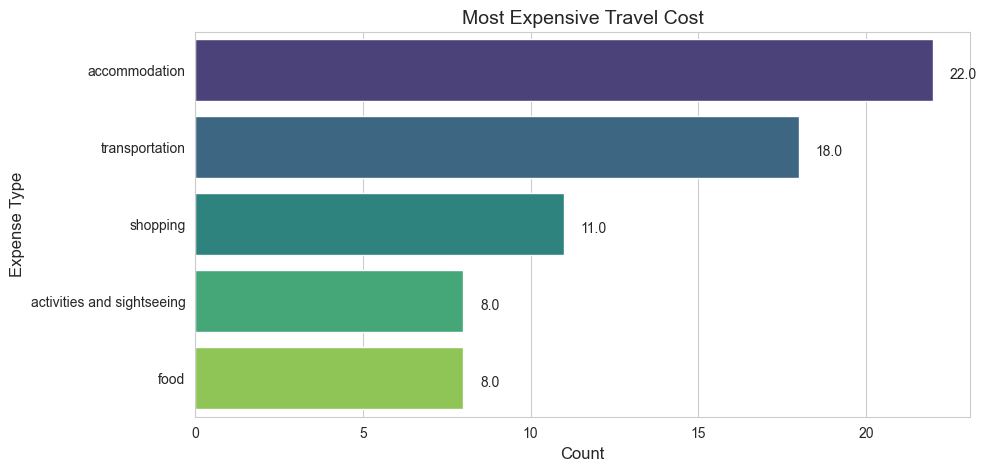

C:\Users\vandi\AppData\Local\Temp\ipykernel_13080\2512953205.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=data, palette="viridis", order=data.value_counts().index)


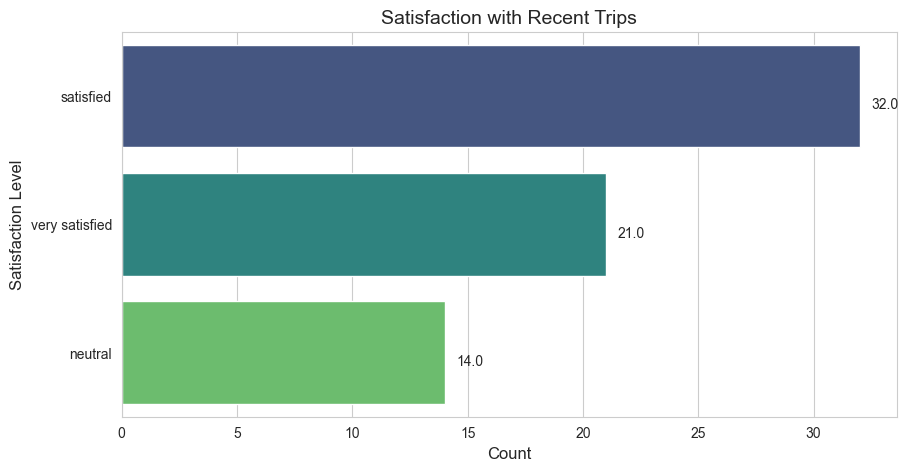

C:\Users\vandi\AppData\Local\Temp\ipykernel_13080\2512953205.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=data, palette="viridis", order=data.value_counts().index)


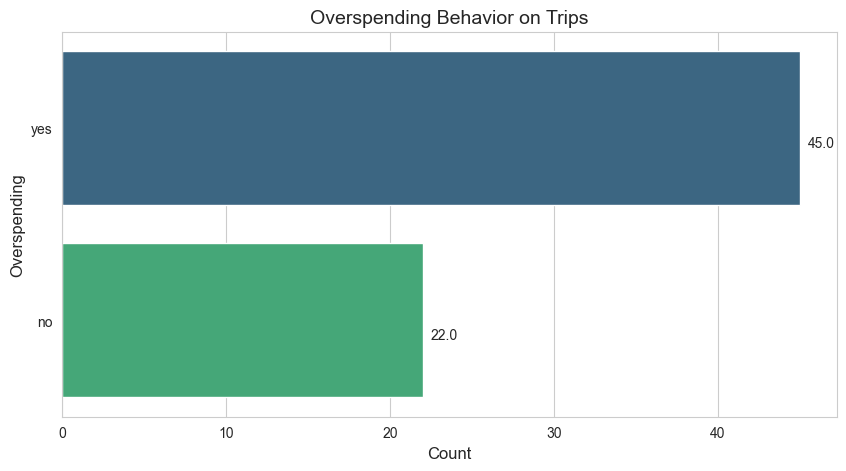

C:\Users\vandi\AppData\Local\Temp\ipykernel_13080\2512953205.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=data, palette="viridis", order=data.value_counts().index)


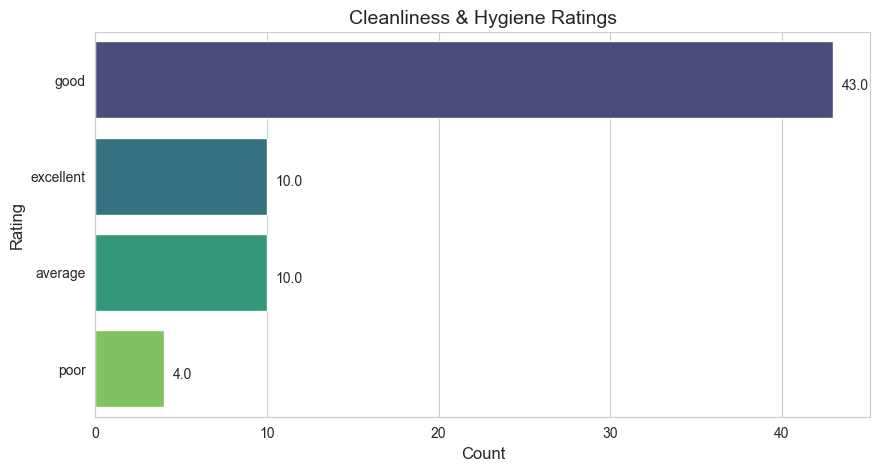

C:\Users\vandi\AppData\Local\Temp\ipykernel_13080\2512953205.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=data, palette="viridis", order=data.value_counts().index)


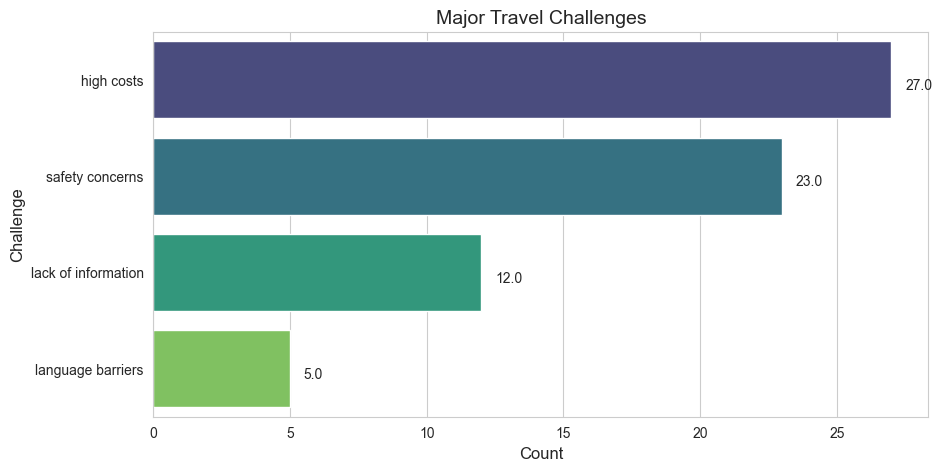

In [4]:
# --- Step 3: Exploratory Data Analysis (EDA) - Visualizations ---
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 5) # Set default figure size

def plot_bar(data, title, xlabel, ylabel, rotation=0):
    plt.figure() # Create a new figure for each plot
    ax = sns.countplot(y=data, palette="viridis", order=data.value_counts().index)
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(rotation=rotation)
    for p in ax.patches:
        ax.annotate(f'{p.get_width()}', (p.get_width() + 0.5, p.get_y() + 0.5))
    plt.show() # Show each plot after creation


# --- Demographic Analysis ---
plot_bar(df_cleaned["1. What is your age group?"], "Age Group Distribution", "Count", "Age Group")
plot_bar(df_cleaned["2. What is your gender?"], "Gender Distribution", "Count", "Gender")
plot_bar(df_cleaned["3. What is your occupation?"], "Occupation Breakdown", "Count", "Occupation")
plot_bar(df_cleaned["4. What is your annual income range?"], "Annual Income Distribution", "Count", "Income Range")

# --- Travel Behavior & Preferences ---
plot_bar(df_cleaned["5. How often do you travel for leisure?"], "Travel Frequency", "Count", "Frequency")
plot_bar(df_cleaned["6. What time of the year do you prefer to travel?"], "Preferred Travel Time", "Count", "Season")
plot_bar(df_cleaned["7. How far do you typically travel for leisure?"], "Travel Distance", "Count", "Distance")
plot_bar(df_cleaned["8. What type of destinations do you prefer?"], "Preferred Destination Types", "Count", "Destination Type")
plot_bar(df_cleaned["9. What is your average travel budget per trip?"], "Average Travel Budget", "Count", "Budget Range")

# --- Decision-Making Factors & Satisfaction ---
plot_bar(df_cleaned["16. What influences your travel destination choices the most?"], "Top Travel Decision Influencers", "Count", "Influencing Factor")
plot_bar(df_cleaned["17. How important is sustainability (eco-friendly options) in your travel choices?"], "Importance of Sustainability in Travel", "Count", "Sustainability Importance")
plot_bar(df_cleaned["20. What is the most expensive part of your trip?"], "Most Expensive Travel Cost", "Count", "Expense Type")
plot_bar(df_cleaned["19. Are you satisfied with your recent travel experience?"], "Satisfaction with Recent Trips", "Count", "Satisfaction Level")
plot_bar(df_cleaned["21. Do you often overspend on your trips compared to your planned budget?"], "Overspending Behavior on Trips", "Count", "Overspending")
plot_bar(df_cleaned["22. How do you rate the cleanliness and hygiene of the destinations you’ve visited?"], "Cleanliness & Hygiene Ratings", "Count", "Rating")
plot_bar(df_cleaned["25. What challenges do you often face while traveling?"], "Major Travel Challenges", "Count", "Challenge")

## Step 4: Advanced Insights & Correlations (Heatmaps)

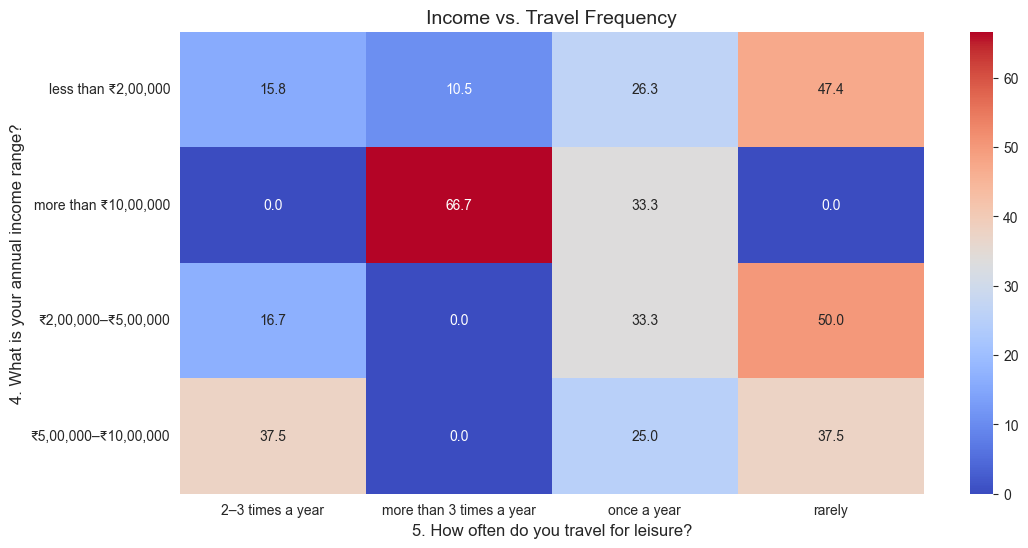

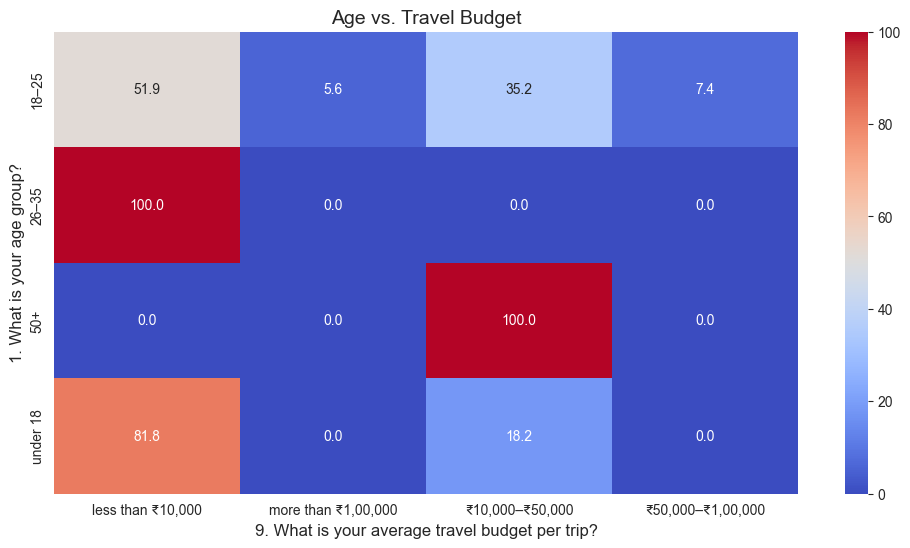

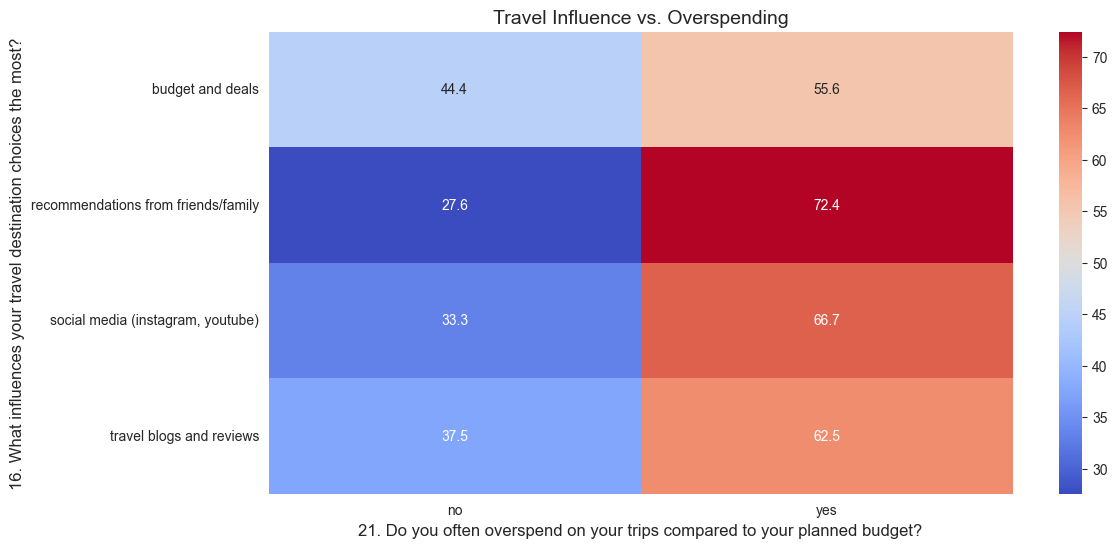

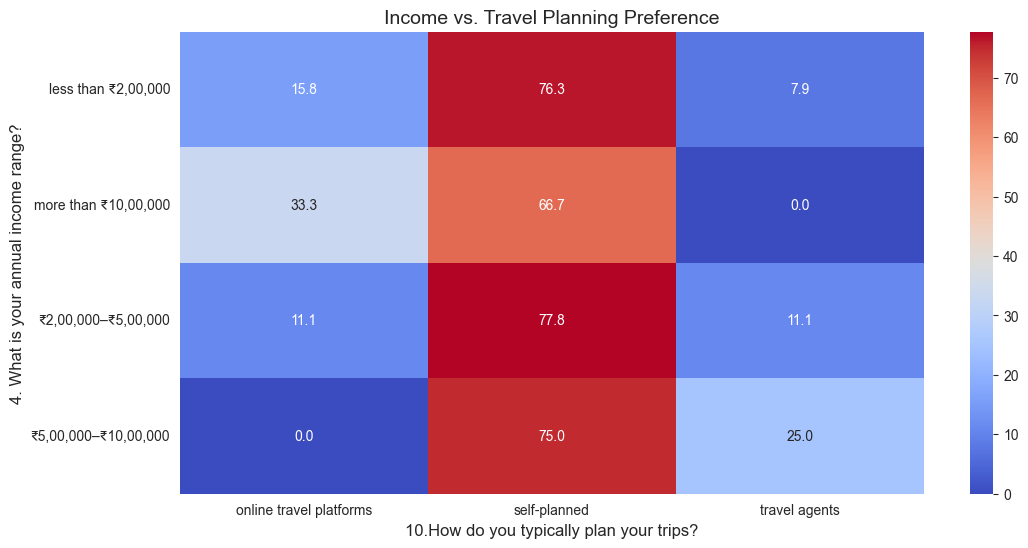

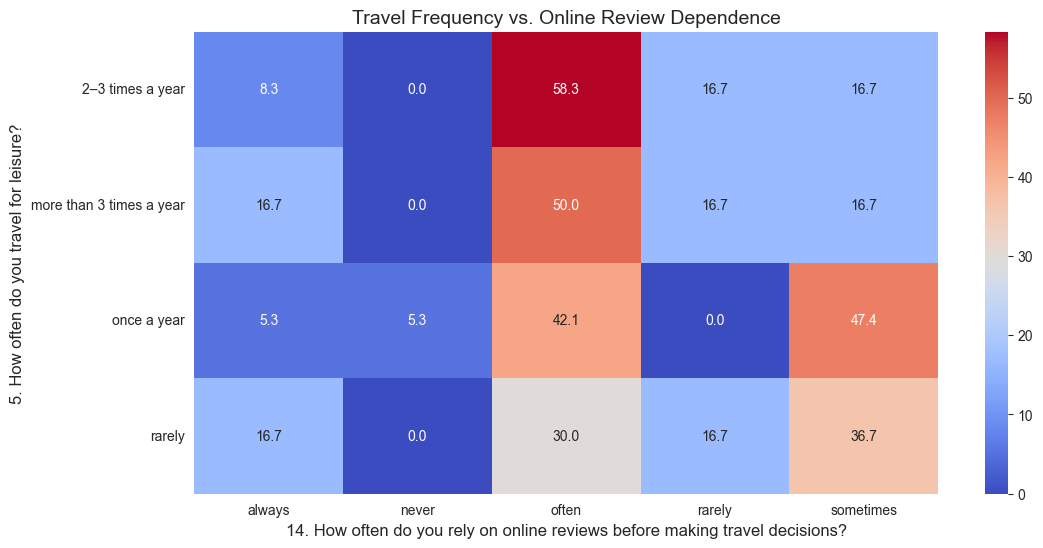

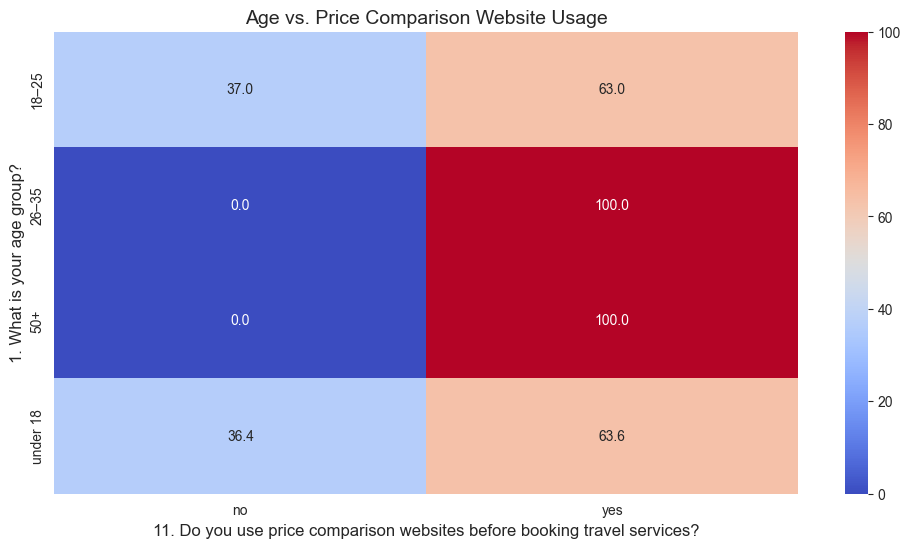

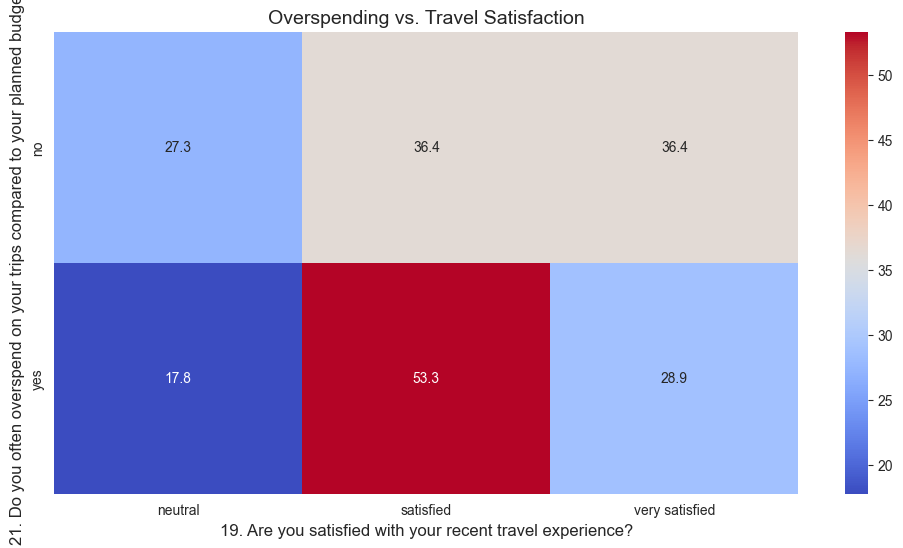

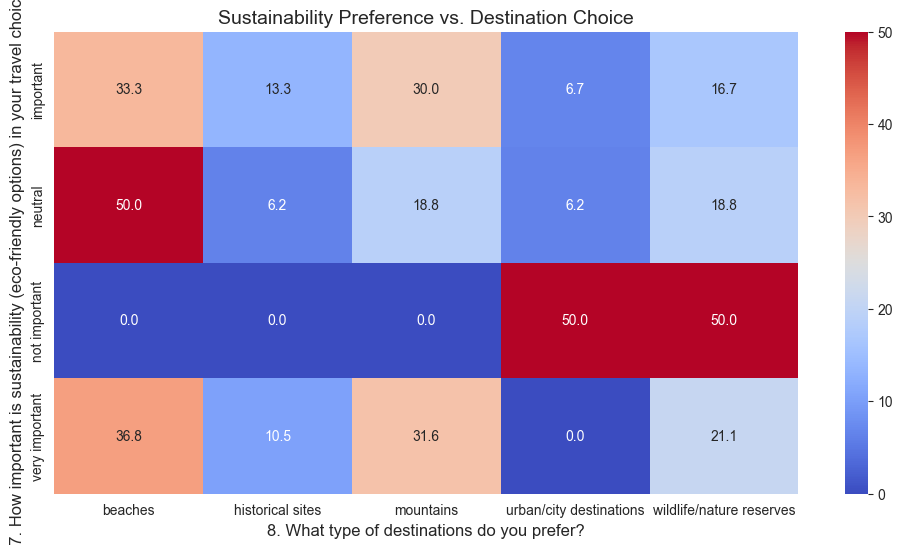

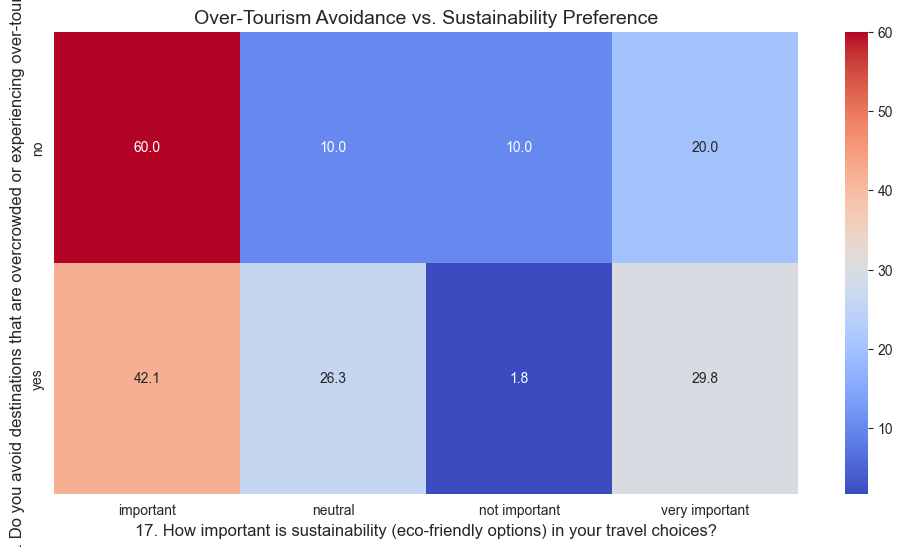

In [5]:
# --- Step 4: Advanced Insights & Correlations (Heatmaps) ---

def plot_heatmap_correlation(data, col1, col2, title):
    plt.figure(figsize=(12, 6))
    correlation_table = pd.crosstab(data[col1], data[col2], normalize="index") * 100
    sns.heatmap(correlation_table, annot=True, cmap="coolwarm", fmt=".1f")
    plt.title(title, fontsize=14)
    plt.xlabel(col2, fontsize=12)
    plt.ylabel(col1, fontsize=12)
    plt.show()

plot_heatmap_correlation(df_cleaned, "4. What is your annual income range?", "5. How often do you travel for leisure?", "Income vs. Travel Frequency")
plot_heatmap_correlation(df_cleaned, "1. What is your age group?", "9. What is your average travel budget per trip?", "Age vs. Travel Budget")
plot_heatmap_correlation(df_cleaned, "16. What influences your travel destination choices the most?", "21. Do you often overspend on your trips compared to your planned budget?", "Travel Influence vs. Overspending")
plot_heatmap_correlation(df_cleaned, "4. What is your annual income range?", "10.How do you typically plan your trips?", "Income vs. Travel Planning Preference")
plot_heatmap_correlation(df_cleaned, "5. How often do you travel for leisure?", "14. How often do you rely on online reviews before making travel decisions?", "Travel Frequency vs. Online Review Dependence")
plot_heatmap_correlation(df_cleaned, "1. What is your age group?", "11. Do you use price comparison websites before booking travel services?", "Age vs. Price Comparison Website Usage")
plot_heatmap_correlation(df_cleaned, "21. Do you often overspend on your trips compared to your planned budget?", "19. Are you satisfied with your recent travel experience?", "Overspending vs. Travel Satisfaction")
plot_heatmap_correlation(df_cleaned, "17. How important is sustainability (eco-friendly options) in your travel choices?", "8. What type of destinations do you prefer?", "Sustainability Preference vs. Destination Choice")
plot_heatmap_correlation(df_cleaned, "24. Do you avoid destinations that are overcrowded or experiencing over-tourism?", "17. How important is sustainability (eco-friendly options) in your travel choices?", "Over-Tourism Avoidance vs. Sustainability Preference")

## Step 5: Machine Learning Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA

# Reload the dataset (ensuring correct format)
file_path = "Travel and Tourism Survey (Responses).xlsx"
df = pd.read_excel(file_path, sheet_name="Form responses 1")
df.columns = df.columns.str.strip().str.lower()  # Clean column names

# Remove timestamp column if it exists
df = df.select_dtypes(exclude=['datetime64'])

# Encode categorical variables using One-Hot Encoding
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # Set sparse_output=False
encoded_cats = ohe.fit_transform(df[categorical_cols])
encoded_cats_df = pd.DataFrame(encoded_cats, columns=ohe.get_feature_names_out(categorical_cols))

# Standard Scaling for numerical data
scaler = StandardScaler()
scaled_nums = scaler.fit_transform(df[numerical_cols])
scaled_nums_df = pd.DataFrame(scaled_nums, columns=numerical_cols)

# Combine processed data
df_processed = pd.concat([scaled_nums_df, encoded_cats_df], axis=1)

# 1️⃣ K-Means Clustering (Traveler Segments)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) # explicitly set n_init
clusters = kmeans.fit_predict(df_processed)
df_encoded_clustered = df.copy() # Use original df for interpretation
df_encoded_clustered['Cluster'] = clusters

print("\nK-Means Cluster Distribution:")
print(df_encoded_clustered['Cluster'].value_counts())

# Visualize Clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_processed)
df_pca = pd.DataFrame(data = pca_result, columns = ['principal component 1', 'principal component 2'])
df_pca['Cluster'] = clusters

plt.figure(figsize=(8,6))
sns.scatterplot(x='principal component 1', y='principal component 2', hue='Cluster', data=df_pca, palette='viridis')
plt.title('K-Means Clusters Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# 2️⃣ Classification - Predict Travel Frequency
X_clf = df_processed.drop(columns=["5. how often do you travel for leisure?"], errors='ignore')
y_clf = df["5. how often do you travel for leisure?"] # Use original labels for interpretation
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf) #stratify for balanced split

# Initialize and Train Classification Models
rf_clf = RandomForestClassifier(random_state=42)
log_clf = LogisticRegression(max_iter=1000, random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)
svm_clf = SVC(random_state=42)

rf_clf.fit(X_train_clf, y_train_clf)
log_clf.fit(X_train_clf, y_train_clf)
dt_clf.fit(X_train_clf, y_train_clf)
svm_clf.fit(X_train_clf, y_train_clf)

# Predictions
rf_pred_clf = rf_clf.predict(X_test_clf)
log_pred_clf = log_clf.predict(X_test_clf)
dt_pred_clf = dt_clf.predict(X_test_clf)
svm_pred_clf = svm_clf.predict(X_test_clf)

# Evaluate Classification Models and Visualize
print("\nClassification Report - Random Forest:")
print(classification_report(y_test_clf, rf_pred_clf))
cm_rf = confusion_matrix(y_test_clf, rf_pred_clf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_clf), yticklabels=np.unique(y_clf))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()

print("\nClassification Report - Logistic Regression:")
print(classification_report(y_test_clf, log_pred_clf))
cm_log = confusion_matrix(y_test_clf, log_pred_clf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_clf), yticklabels=np.unique(y_clf))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

print("\nClassification Report - Decision Tree:")
print(classification_report(y_test_clf, dt_pred_clf))
cm_dt = confusion_matrix(y_test_clf, dt_pred_clf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_clf), yticklabels=np.unique(y_clf))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

print("\nClassification Report - SVM:")
print(classification_report(y_test_clf, svm_pred_clf))
cm_svm = confusion_matrix(y_test_clf, svm_pred_clf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_clf), yticklabels=np.unique(y_clf))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - SVM')
plt.show()

# Feature Importance Visualization (for Random Forest and Decision Tree)
feature_importance_rf = pd.Series(rf_clf.feature_importances_, index=X_train_clf.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_rf.values, y=feature_importance_rf.index, palette='viridis')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Random Forest - Feature Importance")
plt.show()

feature_importance_dt = pd.Series(dt_clf.feature_importances_, index=X_train_clf.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_dt.values, y=feature_importance_dt.index, palette='viridis')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Decision Tree - Feature Importance")
plt.show()


# 3️⃣ Regression - Predict Travel Budget
if "9. what is your average travel budget per trip?" in df.columns: # Use original df columns
    X_reg = df_processed.drop(columns=["9. what is your average travel budget per trip?"], errors='ignore')
    y_reg = df["9. what is your average travel budget per trip?"] # Use original budget values
    X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

    # Initialize and Train Regression Models
    lin_reg = LinearRegression()
    rf_reg = RandomForestRegressor(random_state=42)
    gb_reg = GradientBoostingRegressor(random_state=42)

    lin_reg.fit(X_train_reg, y_train_reg)
    rf_reg.fit(X_train_reg, y_train_reg)
    gb_reg.fit(X_train_reg, y_train_reg)

    # Predictions
    lin_pred_reg = lin_reg.predict(X_test_reg)
    rf_pred_reg = rf_reg.predict(X_test_reg)
    gb_pred_reg = gb_reg.predict(X_test_reg)

    # Evaluate Regression Models
    lin_mae_reg = mean_absolute_error(y_test_reg, lin_pred_reg)
    lin_r2_reg = r2_score(y_test_reg, lin_pred_reg)
    rf_mae_reg = mean_absolute_error(y_test_reg, rf_pred_reg)
    rf_r2_reg = r2_score(y_test_reg, rf_pred_reg)
    gb_mae_reg = mean_absolute_error(y_test_reg, gb_pred_reg)
    gb_r2_reg = r2_score(y_test_reg, gb_pred_reg)

    print("\nRegression Performance (Predicting Travel Budget):")
    print(f"  Linear Regression - MAE: {lin_mae_reg:.4f}, R²: {lin_r2_reg:.4f}")
    print(f"  Random Forest Regressor - MAE: {rf_mae_reg:.4f}, R²: {rf_r2_reg:.4f}")
    print(f"  Gradient Boosting Regressor - MAE: {gb_mae_reg:.4f}, R²: {gb_r2_reg:.4f}")


    # Regression Model Visualizations
    # Predicted vs. Actual plot
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test_reg, lin_pred_reg, alpha=0.6)
    plt.plot(y_test_reg, y_test_reg, color='red') # Ideal prediction line
    plt.xlabel('Actual Travel Budget')
    plt.ylabel('Predicted Travel Budget (Linear Regression)')
    plt.title('Linear Regression: Predicted vs. Actual Budget')
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.scatter(y_test_reg, rf_pred_reg, alpha=0.6)
    plt.plot(y_test_reg, y_test_reg, color='red') # Ideal prediction line
    plt.xlabel('Actual Travel Budget')
    plt.ylabel('Predicted Travel Budget (Random Forest)')
    plt.title('Random Forest Regressor: Predicted vs. Actual Budget')
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.scatter(y_test_reg, gb_pred_reg, alpha=0.6)
    plt.plot(y_test_reg, y_test_reg, color='red') # Ideal prediction line
    plt.xlabel('Actual Travel Budget')
    plt.ylabel('Predicted Travel Budget (Gradient Boosting)')
    plt.title('Gradient Boosting Regressor: Predicted vs. Actual Budget')
    plt.show()

    # Residual plots
    residuals_lin = y_test_reg - lin_pred_reg
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test_reg, y=residuals_lin)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Actual Travel Budget')
    plt.ylabel('Residuals (Linear Regression)')
    plt.title('Residual Plot - Linear Regression')
    plt.show()

    residuals_rf = y_test_reg - rf_pred_reg
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test_reg, y=residuals_rf)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Actual Travel Budget')
    plt.ylabel('Residuals (Random Forest)')
    plt.title('Residual Plot - Random Forest Regressor')
    plt.show()

    residuals_gb = y_test_reg - gb_pred_reg
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test_reg, y=residuals_gb)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Actual Travel Budget')
    plt.ylabel('Residuals (Gradient Boosting)')
    plt.title('Residual Plot - Gradient Boosting Regressor')
    plt.show()

    # Feature Importance (for Random Forest and Gradient Boosting Regressors)
    feature_importance_rf_reg = pd.Series(rf_reg.feature_importances_, index=X_train_reg.columns).sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance_rf_reg.values, y=feature_importance_rf_reg.index, palette='viridis')
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Random Forest Regressor - Feature Importance")
    plt.show()

    feature_importance_gb_reg = pd.Series(gb_reg.feature_importances_, index=X_train_reg.columns).sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance_gb_reg.values, y=feature_importance_gb_reg.index, palette='viridis')
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Gradient Boosting Regressor - Feature Importance")
    plt.show()


else:
    print("\nTravel Budget column not found for Regression analysis.")

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/Travel and Tourism Survey (Responses).xlsx'

## Step 6: Feature Engineering (One-Hot Encoding and Standard Scaling)

In [8]:
# --- Step 6: Feature Engineering (One-Hot Encoding and Standard Scaling) ---
df_fe = df_cleaned.copy() # Create a copy for Feature Engineering

# 6.1 One-Hot Encoding for Categorical Features
categorical_cols_fe = df_fe.select_dtypes(include=['object']).columns
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # sparse_output=False for non-sparse array
encoded_cats_fe = ohe.fit_transform(df_fe[categorical_cols_fe])
encoded_cats_df_fe = pd.DataFrame(encoded_cats_fe, columns=ohe.get_feature_names_out(categorical_cols_fe))

# 6.2 Standard Scaling for Numerical Features
print("\n--- Before Standard Scaling ---") # Debugging section start
print("Data types of df_fe before numerical column selection:")
print(df_fe.dtypes)
numerical_cols_fe = df_fe.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical columns identified for scaling:")
print(numerical_cols_fe)

if not numerical_cols_fe.empty: # Check if there are numerical columns before scaling
    scaler = StandardScaler()
    scaled_nums_fe = scaler.fit_transform(df_fe[numerical_cols_fe])
    scaled_nums_df_fe = pd.DataFrame(scaled_nums_fe, columns=numerical_cols_fe)
    df_processed_fe = pd.concat([scaled_nums_df_fe, encoded_cats_df_fe], axis=1)
    print("\nStandard Scaling applied successfully.") # Debugging message
else:
    print("\nNo numerical columns found for scaling. Skipping StandardScaler.") # Debugging message
    df_processed_fe = encoded_cats_df_fe # If no numerical columns, processed data is just the encoded categorical data


# 6.3 Combine Processed Data (already handled above, inside or outside the if condition)


print("\nFeature Engineered DataFrame - First 5 rows:")
print(df_processed_fe.head())

print("\n--- Code Execution Completed ---")
print("Note: Make sure 'Travel and Tourism Survey (Responses).xlsx' is in the same directory or provide the correct file path.")


--- Before Standard Scaling ---
Data types of df_fe before numerical column selection:
1. What is your age group?                                                                 object
2. What is your gender?                                                                    object
3. What is your occupation?                                                                object
4. What is your annual income range?                                                       object
5. How often do you travel for leisure?                                                    object
6. What time of the year do you prefer to travel?                                          object
7. How far do you typically travel for leisure?                                            object
8. What type of destinations do you prefer?                                                object
9. What is your average travel budget per trip?                                            object
10.How do you typically plan y